In [29]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing

In [30]:
housing= fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [31]:
# We create our own dataframe with

housing_df = pd.DataFrame(housing['data'], columns = housing['feature_names'])

In [32]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
X=housing_df.iloc[:,:-1]

y= housing_df['target']

In [34]:
# Splitting the data into X,y

# We know from 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [35]:
# We can see that we have 8 independent variables and 16512 train and 4128 test samples
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [36]:
# Visualizing the data before Modelling

X_train,y_train

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
 8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
 17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
 14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
 2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   
 ...       ...       ...       ...        ...         ...       ...       ...   
 11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
 11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
 5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
 860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
 15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   
 
        Longitude  
 14196

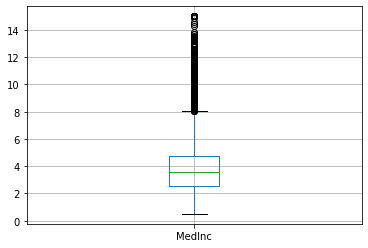

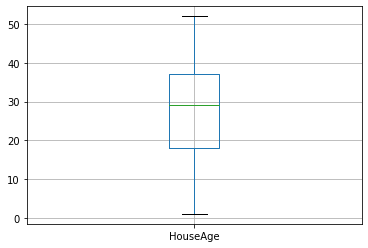

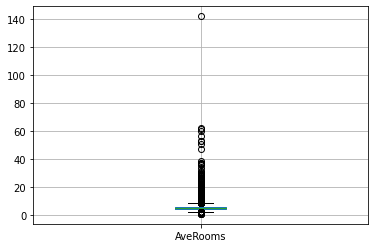

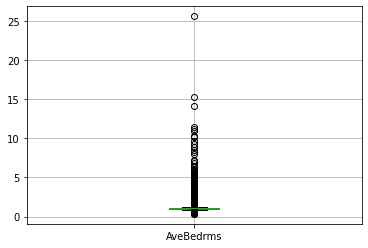

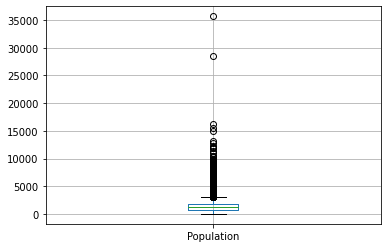

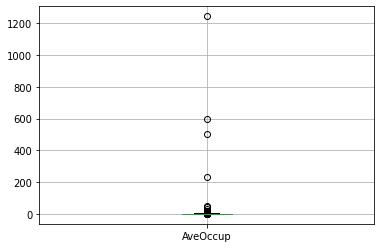

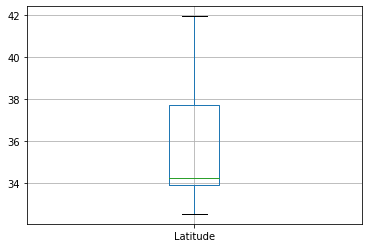

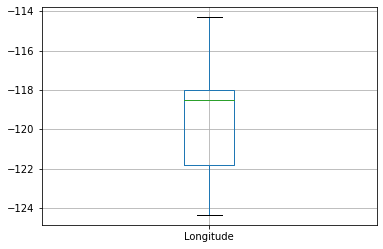

In [37]:
# We see that almost every column has outliers and we need to scale the values

# Therefore we shall use the RobustScaler()
import matplotlib.pyplot as plt

for column in X_train:
    plt.figure()
    X_train.boxplot([column])

In [38]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [39]:
# Trying normal LinearRegression

from sklearn.linear_model import LinearRegression


lr = LinearRegression()



In [40]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
lr.score(X_test_scaled, y_test)

0.575787706032451

## We acheive a benchmark score of 57.57%

In [42]:
from sklearn.ensemble import RandomForestRegressor

Rf = RandomForestRegressor()

Rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [43]:
# We see that we achieved a higher score of 80.74 by just changing the model and implementing Ensemble Techniques.
Rf.score(X_test_scaled, y_test)

0.8039479547923583